*Python Stats and Plotting Tutorial*
=======================

### Install necessary additional packages

In [1]:
!pip install seaborn
!pip install statsmodels

### Import necessary packages 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import statsmodels 
import statsmodels.api as sm
import statsmodels.formula.api as sf
import numpy as np
import scipy as sc

Data Representation and Interaction
===================================

### Read in CSV file to bring in data for brain size, weight, and IQ

In [3]:
brain_size = pd.read_csv('brain_size.csv', sep=";", na_values=".")

### Display the shape of the brain size data

In [4]:
brain_size.shape

(40, 8)

### Display the columns of the brain size data

In [5]:
brain_size.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

### Display the gender data for each of the individuals 

In [6]:
print(brain_size['Gender'])

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


### Display the average VIQ among female individuals in the data set

In [7]:
print(brain_size[brain_size['Gender'] == 'Female']['VIQ'].mean())

109.45


### Split the data into groups based on gender

In [8]:
groupby_gender = brain_size.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print ((gender, float(value.mean())))

('Female', 109.45)
('Male', 115.25)


### Display the data file grouped by gender with meaan values for each category

In [9]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


### Import pandas plotting tools

In [10]:
from pandas.plotting import scatter_matrix

### Display data through scatter matrices for weight, height, and MRI count

array([[<Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Height', ylabel='Weight'>,
        <Axes: xlabel='MRI_Count', ylabel='Weight'>],
       [<Axes: xlabel='Weight', ylabel='Height'>,
        <Axes: xlabel='Height', ylabel='Height'>,
        <Axes: xlabel='MRI_Count', ylabel='Height'>],
       [<Axes: xlabel='Weight', ylabel='MRI_Count'>,
        <Axes: xlabel='Height', ylabel='MRI_Count'>,
        <Axes: xlabel='MRI_Count', ylabel='MRI_Count'>]], dtype=object)

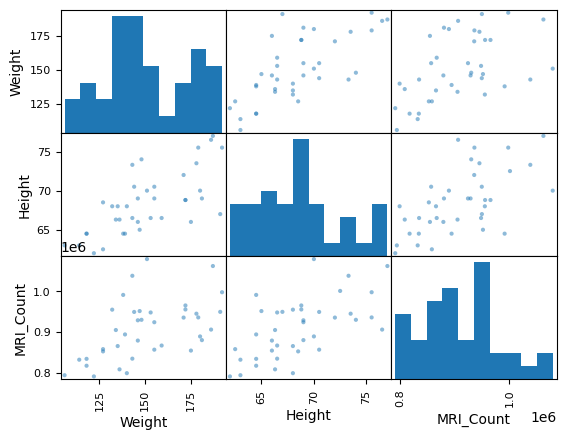

In [11]:
scatter_matrix(brain_size[['Weight', 'Height', 'MRI_Count']])

### Display data through scatter matrices for IQ categories

array([[<Axes: xlabel='PIQ', ylabel='PIQ'>,
        <Axes: xlabel='VIQ', ylabel='PIQ'>,
        <Axes: xlabel='FSIQ', ylabel='PIQ'>],
       [<Axes: xlabel='PIQ', ylabel='VIQ'>,
        <Axes: xlabel='VIQ', ylabel='VIQ'>,
        <Axes: xlabel='FSIQ', ylabel='VIQ'>],
       [<Axes: xlabel='PIQ', ylabel='FSIQ'>,
        <Axes: xlabel='VIQ', ylabel='FSIQ'>,
        <Axes: xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

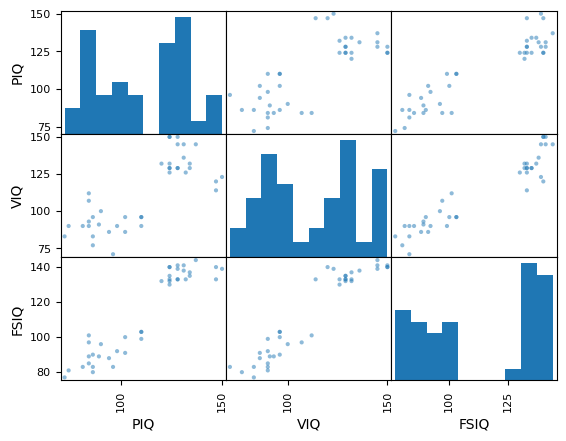

In [12]:
scatter_matrix(brain_size[['PIQ', 'VIQ', 'FSIQ']])

Hypothesis Testing
==================

### Import scipy statistical tests

In [13]:
from scipy import stats

### Test if the population mean of the brain size data is equal to a given value by returning T statistic value and p-value

In [14]:
result=stats.ttest_1samp(brain_size['VIQ'], 0)
statistic = float(result.statistic)
pvalue = float(result.pvalue)
df = int(result.df)
print(f"statistic: {statistic}")
print(f"p-value: {pvalue}")
print(f"Degrees of Freedom: {df}")

statistic: 30.08809997084933
p-value: 1.3289196468727879e-28
Degrees of Freedom: 39


### Based on the stats result, test whether the difference in male and female mean VIQs is significant using a 1 sample t test

In [15]:
female_viq = brain_size[brain_size['Gender'] == 'Female']['VIQ']
male_viq = brain_size[brain_size['Gender'] == 'Male']['VIQ']
result=stats.ttest_ind(female_viq, male_viq)
statistic = float(result.statistic)
pvalue = float(result.pvalue)
df = int(result.df)
print(f"statistic: {statistic}")
print(f"p-value: {pvalue}")
print(f"Degrees of Freedom: {df}")

statistic: -0.7726161723275012
p-value: 0.44452876778583217
Degrees of Freedom: 38


### Test whether two of the IQ measures (FSIQ and PIQ) are significantly different using a 2 sample t test

In [16]:
result = stats.ttest_ind(brain_size['FSIQ'], brain_size['PIQ'])
statistic = float(result.statistic)
pvalue = float(result.pvalue)
df = int(result.df)
print(f"statistic: {statistic}")
print(f"p-value: {pvalue}")
print(f"Degrees of Freedom: {df}")

statistic: 0.465637596380964
p-value: 0.6427725009414841
Degrees of Freedom: 78


### Remove confounding variance from FSIQ and PIQ data 

In [17]:
result = stats.ttest_rel(brain_size['FSIQ'], brain_size['PIQ'])  
statistic = float(result.statistic)
pvalue = float(result.pvalue)
df = int(result.df)
print(f"statistic: {statistic}")
print(f"p-value: {pvalue}")
print(f"Degrees of Freedom: {df}")

statistic: 1.7842019405859857
p-value: 0.08217263818364236
Degrees of Freedom: 39


### The above variance removal can be done using another method: a 1 sample t test on the difference

In [18]:
result = stats.ttest_1samp(brain_size['FSIQ'] - brain_size['PIQ'], 0)
statistic = float(result.statistic)
pvalue = float(result.pvalue)
df = int(result.df)
print(f"statistic: {statistic}")
print(f"p-value: {pvalue}")
print(f"Degrees of Freedom: {df}")

statistic: 1.7842019405859857
p-value: 0.08217263818364236
Degrees of Freedom: 39


### Use Wilcoxon signed-rank test to relax the automatic assumption of Gaussian errors that t-tests come with

In [19]:
result=stats.wilcoxon(brain_size['FSIQ'], brain_size['PIQ'])  
statistic = float(result.statistic)
pvalue = float(result.pvalue)
print(f"statistic: {statistic}")
print(f"p-value: {pvalue}")

statistic: 274.5
p-value: 0.10659492713506856


Linear models, multiple factors, and analysis of variance
=========================================================

### Fit a linear model (not using brain size data)

### Generate simulated data based on the model

In [20]:
x = np.linspace(-5, 5, 20)
np.random.seed(1)

### Generate normal distributed noise

In [21]:
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)

### Generate data frame and variables along with it

In [22]:
sim_data = pd.DataFrame({'x': x, 'y': y})

### Import, create and fit OLS model with the data frame

In [23]:
from statsmodels.formula.api import ols

In [24]:
ols_model = ols("y ~ x", sim_data).fit()

### Display and analyze OLS statistics

In [25]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           8.56e-08
Time:                        19:12:26   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

### Again using the brain size data set
### Compare male and female IQs with an OLS linear model

In [26]:
iq_model = ols("VIQ ~ Gender + 1", brain_size).fit()

### Print model summary 

In [27]:
print(iq_model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Thu, 11 Jul 2024   Prob (F-statistic):              0.445
Time:                        19:12:26   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

### Some variables are automatically detected as categorical, if not, an integer column can be forced to be categorical: 

In [28]:
categorical_model = ols('VIQ ~ C(Gender)', brain_size).fit()

### Create a dataframe for FSIQ values

In [29]:
brain_size_fisq = pd.DataFrame({'iq': brain_size['FSIQ'], 'type': 'fsiq'})

### Create a dataframe for PIQ values

In [30]:
brain_size_piq = pd.DataFrame({'iq': brain_size['PIQ'], 'type': 'piq'})

### Generate long-form table which is separated by categorical variable and lists IQs 

In [31]:
brain_size_long = pd.concat((brain_size_fisq, brain_size_piq))

### Display the long form data table

In [32]:
print(brain_size_long)  

     iq  type
0   133  fsiq
1   140  fsiq
2   139  fsiq
3   133  fsiq
4   137  fsiq
..  ...   ...
35  128   piq
36  124   piq
37   94   piq
38   74   piq
39   89   piq

[80 rows x 2 columns]


### Create and print linear regression model based on long-form IQ data table

In [33]:
brain_size_long_model = ols("iq ~ type", brain_size_long).fit()

In [34]:
print(brain_size_long_model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Thu, 11 Jul 2024   Prob (F-statistic):              0.643
Time:                        19:12:26   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      

### Import necessary packages

In [35]:
from pandas.plotting import scatter_matrix, andrews_curves, autocorrelation_plot, bootstrap_plot, parallel_coordinates, radviz

from statsmodels.formula.api import ols

### Read in iris CSV file to bring in data for sepal and petal size 

In [36]:
iris = pd.read_csv('iris.csv')

### Create and print linear regression model based on sepal and petal size data table

In [37]:
model = ols('sepal_width ~ name + petal_length', iris).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           1.58e-20
Time:                        19:12:26   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

### ANOVA test to test the difference between the coefficient associated to versicolor and virginica in the linear model

In [38]:
result = model.f_test([0, 1, -1, 0]) 
print(model.f_test([0, 1, -1, 0])) 

<F test: F=3.2453353465741173, p=0.07369058781701415, df_denom=146, df_num=1>


Seaborn for statistical exploration
===================================

### Import necessary libraries

In [39]:
import urllib
import os

### Load and download wage data from internet url

In [40]:
if not os.path.exists('wages.txt'):
    urllib.request.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
                       'wages.txt')

### Separate and name columns appropriately

In [41]:
names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]

In [42]:
short_names = [n.split(':')[0] for n in names]

In [43]:
wages = pd.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None, header=None, engine = 'python')
wages.columns = short_names

### Display wage data

In [44]:
print(wages)

     EDUCATION  SOUTH  SEX  EXPERIENCE  UNION   WAGE  AGE  RACE  OCCUPATION  \
0            8      0    1          21      0   5.10   35     2           6   
1            9      0    1          42      0   4.95   57     3           6   
2           12      0    0           1      0   6.67   19     3           6   
3           12      0    0           4      0   4.00   22     3           6   
4           12      0    0          17      0   7.50   35     3           6   
..         ...    ...  ...         ...    ...    ...  ...   ...         ...   
529         18      0    0           5      0  11.36   29     3           5   
530         12      0    1          33      0   6.10   51     1           5   
531         17      0    1          25      1  23.25   48     1           5   
532         12      1    0          13      1  19.88   31     3           5   
533         16      0    0          33      0  15.38   55     3           5   

     SECTOR  MARR  
0         1     1  
1         1

### Display a scatter matrix for each of the wage coontinuousvariable columns

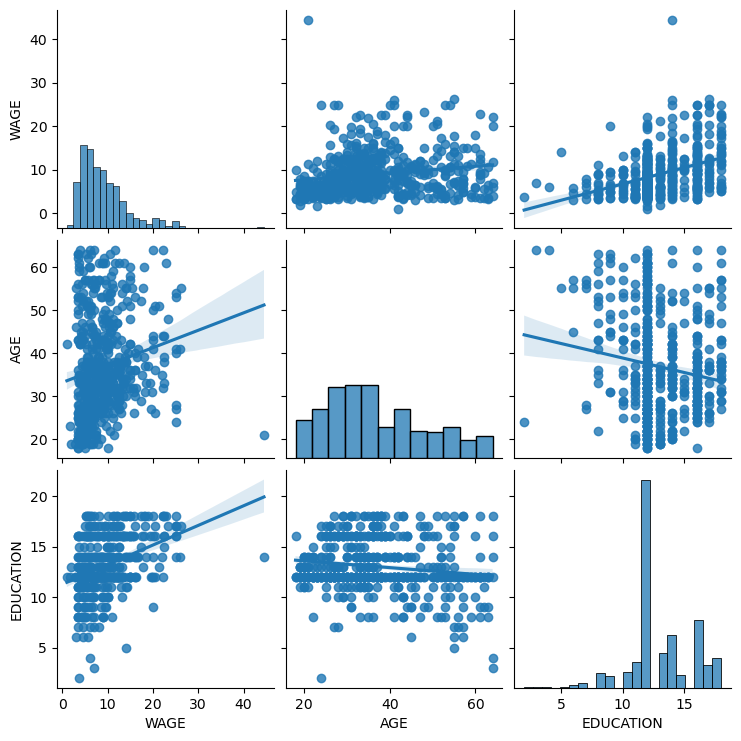

In [45]:
sns.pairplot(wages, vars=['WAGE', 'AGE', 'EDUCATION'],
                 kind='reg')

### Display a scatter matrix for each of the wage continuous variable columns and color them based on categorical variables

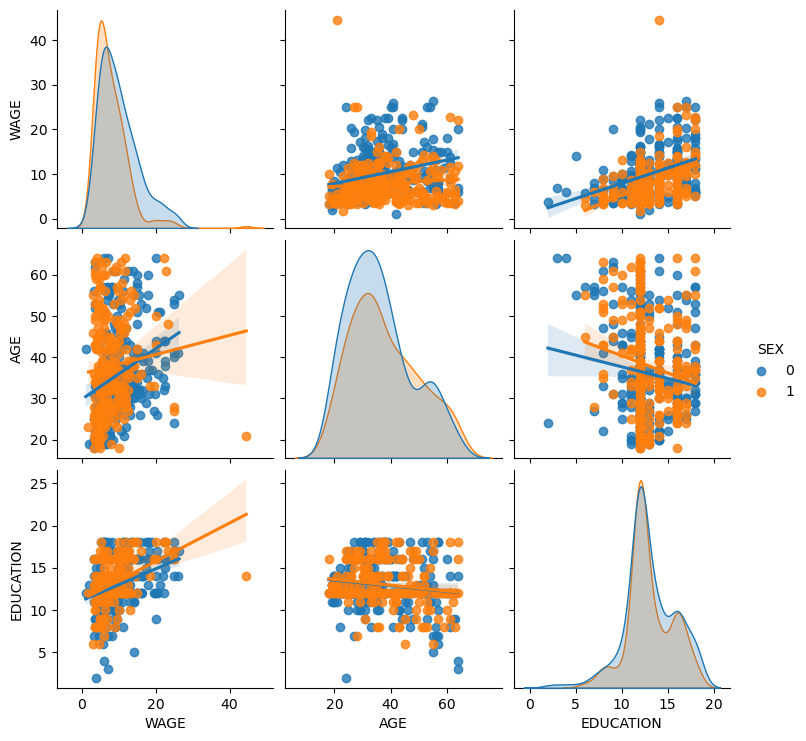

In [46]:
sns.pairplot(wages, vars=['WAGE', 'AGE', 'EDUCATION'],
                 kind='reg', hue='SEX')

### Reset the default figure display settings

In [47]:
plt.rcdefaults()

### Univariate regression: generate a plot showing the relationship between wage and education variables

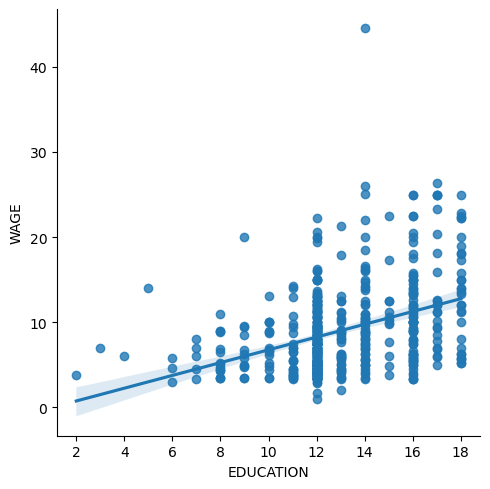

In [48]:
sns.lmplot(y='WAGE', x='EDUCATION', data=wages) 

Testing for interactions
========================

### Test whether wage increase more with education for males or females

### Generate a model that tests for the variance of slope in education and gender

In [49]:
result = ols(formula='WAGE ~ EDUCATION + SEX + EDUCATION * SEX',
                data=wages).fit()    
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     41.50
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           4.24e-24
Time:                        19:12:47   Log-Likelihood:                -1575.0
No. Observations:                 534   AIC:                             3158.
Df Residuals:                     530   BIC:                             3175.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1046      1.314      0.841